In [1]:
print("all ok")

all ok


In [2]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: c:\Users\pramod\Desktop\KRISH_ACADEMY\LLMOPS_Projects\automated-research-report-generation


In [3]:
from research_and_analyst.utils.model_loader import ModelLoader

In [4]:
model_loader = ModelLoader()

{"timestamp": "2025-11-08T02:31:27.333373Z", "level": "warning", "event": "OPENAI_API_KEY is missing from environment"}
{"timestamp": "2025-11-08T02:31:27.337066Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-11-08T02:31:27.340468Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-11-08T02:31:27.374178Z", "level": "info", "event": "YAML config loaded"}


In [5]:
llm=model_loader.load_llm()

{"provider": "google", "model": "gemini-2.0-flash", "timestamp": "2025-11-08T02:31:27.397245Z", "level": "info", "event": "Loading LLM"}


In [6]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [7]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [8]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage , SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#health

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),
Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [9]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [10]:
Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

Analyst(name='sunny savita', role='genai eng', affiliation='AI Research LAB', description='I am genai developer as well as mentor')

In [11]:
analyst = Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [12]:
analyst.name

'sunny savita'

In [13]:
analyst.role

'genai eng'

In [14]:
analyst.affiliation

'AI Research LAB'

In [15]:
print(analyst.persona)

Name: sunny savita
Role: genai eng
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [16]:
class Perspectives(BaseModel):
       analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [17]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [18]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)  

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [19]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [20]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [21]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [22]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}
    

In [23]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on preventative healthcare and the impact of public health policies on community well-being. Concerned with health equity and access to care for underserved populations.'),
  Analyst(name='Dr. David Chen', role='Healthcare Economist', affiliation='Harvard Medical School', description='Analyzes healthcare costs, insurance models, and the economic impact of medical innovations. Motivated by finding sustainable and efficient solutions to healthcare financing challenges.')]}

In [24]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info', 
    'info': 'add me'}
    )

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details..


{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on preventative healthcare and the impact of public health policies on community well-being. Concerned with health equity and access to care for underserved populations.'),
  Analyst(name='Dr. David Chen', role='Healthcare Economist', affiliation='Harvard Medical School', description='Analyzes healthcare costs, insurance models, and the economic impact of medical innovations. Motivated by finding sustainable and efficient solutions to healthcare financing challenges.')]}

In [25]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [26]:
def should_continue(state):
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "skip", "done", "continue"]:
        return "create_analyst"
    return END


In [27]:
# def should_continue(state):
#     """ Return the next node to execute """
#     human_analyst_feedback = state.get("human_analyst_feedback",None)
#     if human_analyst_feedback:
#         return "create_analyst"

In [28]:
from IPython.display import Image, display

## First Workflow

In [29]:
builder = StateGraph(GenerateAnalystsState)

In [30]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [31]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                        should_continue,
                        ["create_analyst",
                        END])

In [32]:
memory = MemorySaver()

In [33]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

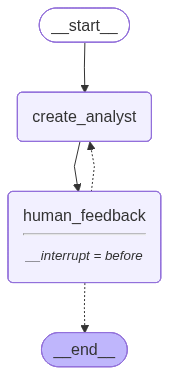

In [34]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [35]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [36]:
max_analysts = 4

In [37]:
thread =  {"configurable":{"thread_id":1}}

In [38]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  
            
        

Name: Alice Chen
Affiliation: TechForward Innovations
Role: Lead AI Architect
Description: Focuses on the architectural benefits of Langgraph, particularly its modularity and scalability for complex agent systems. She is motivated by building robust and maintainable AI solutions.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Sentinel AI Ethics Group
Role: AI Risk Management Officer
Description: Concerned with the safety and ethical implications of Langgraph, especially regarding its use in autonomous agents. He seeks to ensure responsible development and deployment, focusing on mitigating potential risks.
--------------------------------------------------
Name: Charlie Davis
Affiliation: QuantumLeap AI Research
Role: AI Research Scientist
Description: Interested in Langgraph's potential for advancing AI research, particularly in areas like multi-agent collaboration and complex reasoning. He is driven by exploring novel applications and pushing the bo

In [39]:
state = graph.get_state(thread)

In [40]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='Lead AI Architect', affiliation='TechForward Innovations', description='Focuses on the architectural benefits of Langgraph, particularly its modularity and scalability for complex agent systems. She is motivated by building robust and maintainable AI solutions.'), Analyst(name='Bob Johnson', role='AI Risk Management Officer', affiliation='Sentinel AI Ethics Group', description='Concerned with the safety and ethical implications of Langgraph, especially regarding its use in autonomous agents. He seeks to ensure responsible development and deployment, focusing on mitigating potential risks.'), Analyst(name='Charlie Davis', role='AI Research Scientist', affiliation='QuantumLeap AI Research', description="Interested in Langgraph's potential for advancing AI research, particularly in areas like multi-agent collaboration and complex reaso

In [41]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Alice Chen', role='Lead AI Architect', affiliation='TechForward Innovations', description='Focuses on the architectural benefits of Langgraph, particularly its modularity and scalability for complex agent systems. She is motivated by building robust and maintainable AI solutions.'),
  Analyst(name='Bob Johnson', role='AI Risk Management Officer', affiliation='Sentinel AI Ethics Group', description='Concerned with the safety and ethical implications of Langgraph, especially regarding its use in autonomous agents. He seeks to ensure responsible development and deployment, focusing on mitigating potential risks.'),
  Analyst(name='Charlie Davis', role='AI Research Scientist', affiliation='QuantumLeap AI Research', description="Interested in Langgraph's potential for advancing AI research, particularly in areas like multi-agent collaboration and complex reasoning. He is dri

In [42]:
state.next

('human_feedback',)

In [43]:
# memory.storage

In [44]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0bc4b1-df2a-6901-bfff-b1b3d7797e86': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-11-08T02:32:05.949670+00:00\xa2id\xd9$1f0bc4b1-df2a-6901-bfff-b1b3d7797e86\xb0channel_versions\x81\xa9__start__\xd9100000000000000000000000000000001.0.75100479378388\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0bc4b1-df40-6670-8000-29d53d100918': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-11-08T02:32:05.958616+00:00\xa2id\xd9$1f0bc4b1-df40-6670-8000-29d53d100918\xb0channel_versions\x84\xa9__start__\xd9400000000000000000000000000000002.0.13074594528712646\xa5topic\xd9400000000000000000000000000000002.0.13074594528712646\xacmax_analysts\xd9400000000000000000000000000000002.0.13074594528712646\xb8branch:to:create_analyst\xd9400000000000000000000000000000002.0.13074594528712646\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\

In [45]:
# import msgpack

# for thread_id, ns_dict in memory.storage.items():
#     print(f"\n Thread ID: {thread_id}")
    
#     # ns_dict = defaultdict(dict, {'': {...}})
#     for ns, ckpts in ns_dict.items():
#         print(f"  Namespace: '{ns}'")
        
#         # ckpts = dict of {checkpoint_id: (packed_values, packed_metadata, parent_id)}
#         for ckpt_id, (packed_values, packed_metadata, parent_id) in ckpts.items():
#             print(f"    Checkpoint ID: {ckpt_id}")
            
#             # Decode msgpack binary
#             values = msgpack.unpackb(packed_values[1], raw=False)
#             meta = msgpack.unpackb(packed_metadata[1], raw=False)
            
#             print(f"    Values keys: {list(values.keys())}")
#             print(f"    Parent ID: {parent_id}")
#             print(f"    Metadata: {meta}")
#             print("-" * 80)


In [46]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc4b2-0317-6505-8001-e0cdabb5adb0'}}

In [47]:
thread

{'configurable': {'thread_id': '1'}}

In [48]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc4b2-6c7b-6ae9-8002-597978332f77'}}

In [49]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Alice Chen
Affiliation: TechForward Innovations
Role: Lead AI Architect
Description: Focuses on the architectural benefits of Langgraph, particularly its modularity and scalability for complex agent systems. She is motivated by building robust and maintainable AI solutions.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Sentinel AI Ethics Group
Role: AI Risk Management Officer
Description: Concerned with the safety and ethical implications of Langgraph, especially regarding its use in autonomous agents. He seeks to ensure responsible development and deployment, focusing on mitigating potential risks.
--------------------------------------------------
Name: Charlie Davis
Affiliation: QuantumLeap AI Research
Role: AI Research Scientist
Description: Interested in Langgraph's potential for advancing AI research, particularly in areas like multi-agent collaboration and complex reasoning. He is driven by exploring novel applications and pushing the bo

In [50]:
state = graph.get_state(thread)

In [51]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and iteration capabilities for startups. Concerned with minimizing development overhead and maximizing agility in a competitive market. Motivated by faster time-to-market and efficient resource allocation."), Analyst(name='Raj Patel', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Focuses on Langgraph's scalability and integration within existing enterprise systems. Concerned with security, compliance, and governance when deploying AI solutions. Motivated by robust performance and seamless integration with legacy infrastructure."), Analyst(name='Lena Meyer', role='AI Research Scientist', affi

In [52]:
state.next

('human_feedback',)

In [53]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and iteration capabilities for startups. Concerned with minimizing development overhead and maximizing agility in a competitive market. Motivated by faster time-to-market and efficient resource allocation."),
  Analyst(name='Raj Patel', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Focuses on Langgraph's scalability and integration within existing enterprise systems. Concerned with security, compliance, and governance when deploying AI solutions. Motivated by robust performance and seamless integration with legacy infrastructure."),
  Analyst(name='Lena Meyer', role='AI Research Scientist', affiliation='Futur

In [54]:
# import msgpack

# def get_all_checkpoints(memory, thread_id="1"):
#     """Return all checkpoints in chronological order for a thread."""
#     checkpoints = []
#     ns_dict = memory.storage.get(thread_id, {})
#     if "" not in ns_dict:
#         return []

#     for ckpt_id, (packed_values, packed_meta, parent_id) in ns_dict[""].items():
#         values = msgpack.unpackb(packed_values[1], raw=False)
#         meta = msgpack.unpackb(packed_meta[1], raw=False)
#         checkpoints.append({
#             "id": ckpt_id,
#             "parent": parent_id,
#             "topic": values.get("topic"),
#             "feedback": values.get("human_analyst_feedback"),
#             "analyst_count": len(values.get("analysts", [])),
#             "analysts": [a.model_dump() for a in values.get("analysts", [])],
#             "step": meta.get("step"),
#             "created_at": values.get("ts", None)
#         })
#     return checkpoints

# # Fetch all
# history = get_all_checkpoints(memory)

# # Sort by step (to get chronological order)
# history = sorted(history, key=lambda x: (x["step"] or 0))

# # Display neatly
# for h in history:
#     print(f"\nSTEP {h['step']} | CHECKPOINT {h['id']}")
#     print(f"Parent: {h['parent']}")
#     print(f"Topic: {h['topic']}")
#     print(f"Feedback: {h['feedback']}")
#     print(f"Analysts generated: {h['analyst_count']}")
#     print("-"*100)


In [55]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [56]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config
cfg

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc4b2-9fd0-6c90-8005-8e4a6db75ccc'}}

In [57]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc4b2-a599-6ac4-8006-992b97d32425'}}

In [58]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)
final_state

()


StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': '', 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and iteration capabilities for startups. Concerned with minimizing development overhead and maximizing agility in a competitive market. Motivated by faster time-to-market and efficient resource allocation."), Analyst(name='Raj Patel', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Focuses on Langgraph's scalability and integration within existing enterprise systems. Concerned with security, compliance, and governance when deploying AI solutions. Motivated by robust performance and seamless integration with legacy infrastructure."), Analyst(name='Lena Meyer', role='AI Research Scientist', affiliation='FutureAI Labs', description="Focuses on Langgraph's potential for advancing AI r

In [59]:
print(final_state.metadata)


{'source': 'update', 'step': 6, 'parents': {}}


In [60]:
analysts = final_state.values.get('analysts')

In [61]:
analysts

[Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and iteration capabilities for startups. Concerned with minimizing development overhead and maximizing agility in a competitive market. Motivated by faster time-to-market and efficient resource allocation."),
 Analyst(name='Raj Patel', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Focuses on Langgraph's scalability and integration within existing enterprise systems. Concerned with security, compliance, and governance when deploying AI solutions. Motivated by robust performance and seamless integration with legacy infrastructure."),
 Analyst(name='Lena Meyer', role='AI Research Scientist', affiliation='FutureAI Labs', description="Focuses on Langgraph's potential for advancing AI research and development. Concerned with pushing the boundaries of agentic AI and exploring novel applications. Motivated by innovation and contributin

In [62]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Ava Chen
Affiliation: InnovateAI
Role: Startup CTO
Description: Focuses on Langgraph's rapid prototyping and iteration capabilities for startups. Concerned with minimizing development overhead and maximizing agility in a competitive market. Motivated by faster time-to-market and efficient resource allocation.
--------------------------------------------------
Name: Raj Patel
Affiliation: GlobalTech Solutions
Role: Enterprise AI Architect
Description: Focuses on Langgraph's scalability and integration within existing enterprise systems. Concerned with security, compliance, and governance when deploying AI solutions. Motivated by robust performance and seamless integration with legacy infrastructure.
--------------------------------------------------
Name: Lena Meyer
Affiliation: FutureAI Labs
Role: AI Research Scientist
Description: Focuses on Langgraph's potential for advancing AI research and development. Concerned with pushing the boundaries of agentic AI and exploring novel ap

In [63]:
"The benefits of adopting LangGraph as an agent framework"

'The benefits of adopting LangGraph as an agent framework'

In [64]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


Either you can use Google Serper API or use duckduckgo

In [65]:
docs

[Document(metadata={'title': 'LangChain', 'summary': "LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n", 'source': 'https://en.wikipedia.org/wiki/LangChain'}, page_content='LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n== History ==\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startu

In [66]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
print(docs[0].page_content[:500])

Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".


== Characteristics ==
In 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:

On-demand self-service: "A consumer ca


In [67]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
print(docs)

[Document(metadata={'title': 'Cloud computing', 'summary': 'Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".\n\n', 'source': 'https://en.wikipedia.org/wiki/Cloud_computing'}, page_content='Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".\n\n\n== Characteristics ==\nIn 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:\n\nOn-demand self-service: "A consumer can unilaterally provision computing capabilities, such as server time and network storage, as neede

In [68]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="AWS").load()
print(docs[0].page_content[:500])

c:\Users\pramod\Desktop\KRISH_ACADEMY\LLMOPS_Projects\automated-research-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\pramod\Desktop\KRISH_ACADEMY\LLMOPS_Projects\automated-research-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Amazon Web Services, Inc. (AWS) is a subsidiary of Amazon that provides on-demand cloud computing platforms and APIs to individuals, companies, and governments, on a metered, pay-as-you-go basis.
Clients often use this in combination with autoscaling (a process that allows a client to use more computing in times of high application usage, and then scale down to reduce costs when there is less traffic). These cloud computing web services provide various services related to networking, compute, st


In [69]:
from langchain_community.utilities import WikipediaAPIWrapper

In [70]:
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

## Second Workflow

In [71]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [72]:
from dotenv import load_dotenv
load_dotenv()
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [73]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)

C:\Users\pramod\AppData\Local\Temp\ipykernel_7528\1029971610.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


In [74]:
tavily_search.invoke("langgraph")

[{'title': 'What is LangGraph? - GeeksforGeeks',
  'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
  'content': '# What is LangGraph?\n\nLast Updated : \n10 Oct, 2025\n\nSuggest changes\n\n1 Likes\n\nLangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models (LLMs) with graph-based architectures allowing developers to map, organize and optimize how AI agents interact and make decisions.',
  'score': 0.9345448},
 {'title': 'LangGraph overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': "Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents. LangGraph is very low-level, and focused entirely on agent orchestration. B

In [75]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


In [76]:
docs

[Document(metadata={'title': 'LangChain', 'summary': "LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n", 'source': 'https://en.wikipedia.org/wiki/LangChain'}, page_content='LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n== History ==\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startu

In [77]:
len(docs)

25

[Document(metadata={'title': 'LangChain', 'summary': "LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.", 'source': 'https://en.wikipedia.org/wiki/LangChain'}, page_content='LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n== History ==\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark.\nIn the third quarter of 2023, the LangChain Expression Language (LCEL) was introduced, which provides a declarative way to define chains of actions.\nIn October 2023 LangChain introduced LangServe, a deployment tool to host LCEL code as a production-ready API.\nIn February 2024 LangChain released LangSmith, a closed-source observability and evaluation platform for LLM applications, and announced a US $25 million Series A led by Sequoia Capital. On 14 May 2025 the company launched LangGraph Platform into general availability, providing managed infrastructure for deploying long-running, stateful AI agents.\n\n\n== Capabilities ==\nLangChain\'s developers highlight the framework\'s applicability to use-cases including chatbots, retrieval-augmented generation,  document summarization, and synthetic data generation.\nAs of March 2023, LangChain included integrations with systems including Amazon, Google, and Microsoft Azure cloud storage; API wrappers for news, movie information, and weather; Bash for summarization, syntax and semantics checking, and execution of shell scripts; multiple web scraping subsystems and templates; few-shot learning prompt generation support; finding and summarizing "todo" tasks in code; Google Drive documents, spreadsheets, and presentations summarization, extraction, and creation; Google Search and Microsoft Bing web search; OpenAI, Anthropic, and Hugging Face language models; iFixit repair guides and wikis search and summarization; MapReduce for question answering, combining documents, and question generation; N-gram overlap scoring; PyPDF, pdfminer, fitz, and pymupdf for PDF file text extraction and manipulation; Python and JavaScript code generation, analysis, and debugging; Milvus vector database to store and retrieve vector embeddings; Weaviate vector database to cache embedding and data objects; Redis cache database storage; Python RequestsWrapper and other methods for API requests; SQL and NoSQL databases including JSON support; Streamlit, including for logging; text mapping for k-nearest neighbors search; time zone conversion and calendar operations; tracing and recording stack symbols in threaded and asynchronous subprocess runs; and the Wolfram Alpha website and SDK. As of April 2023, it can read from more than 50 document types and data sources.\n\n\n== LangChain tools ==\n\n\n== References ==\n\n\n== External links ==\n\nOfficial website\nDiscord server support hub\nLangchain-ai on GitHub'),


LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 

In [78]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval.")

In [79]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [80]:
print(analyst.persona)

Name: Kenji Tanaka
Role: AI Product Manager
Affiliation: DataWise Inc.
Description: Focuses on Langgraph's user experience and productization aspects. Concerned with ease of use, accessibility, and practical applications for end-users. Motivated by creating user-friendly AI products that solve real-world problems.



In [81]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Kenji Tanaka\nRole: AI Product Manager\nAffiliation: DataWise Inc.\nDescription: Focuses on Langgraph\'s user experience and productization aspects. Concerned with ease of use, accessibility, and practical applications for end-users. Motivated by creating user-friendly AI products that solve real-world problems.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so mu

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'

In [82]:
def generation_question(state:InterviewState):
    """Node to generate the questions"""
    
    #get state
    analyst = state["analyst"]
    messages = state["messages"]
    print(messages)
    
    #generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)]+messages)
    
    #returen the question through state
    return {"messages":[question]}

In [83]:
analyst

Analyst(name='Kenji Tanaka', role='AI Product Manager', affiliation='DataWise Inc.', description="Focuses on Langgraph's user experience and productization aspects. Concerned with ease of use, accessibility, and practical applications for end-users. Motivated by creating user-friendly AI products that solve real-world problems.")

In [84]:
class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

In [85]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],"messages":[HumanMessage(content="hi do the proper search according to the experties")]}

In [86]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Kenji Tanaka', role='AI Product Manager', affiliation='DataWise Inc.', description="Focuses on Langgraph's user experience and productization aspects. Concerned with ease of use, accessibility, and practical applications for end-users. Motivated by creating user-friendly AI products that solve real-world problems."),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='hi do the proper search according to the experties', additional_kwargs={}, response_metadata={})]}

In [87]:
result = generation_question(state)

[HumanMessage(content='hi do the proper search according to the experties', additional_kwargs={}, response_metadata={})]


In [88]:
result

{'messages': [AIMessage(content="Okay, here we go.\n\nHi Kenji, my name is Sarah Chen, and I'm an analyst working on understanding the current state and future potential of LangGraph, particularly from a user experience and productization perspective. I understand you're deeply involved in that at DataWise Inc.\n\nTo start, what's the biggest misconception people have about using LangGraph, and how does that impact their initial experience?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--386ced08-916a-4d22-9423-9edb3ed9bfc4-0', usage_metadata={'input_tokens': 232, 'output_tokens': 86, 'total_tokens': 318, 'input_token_details': {'cache_read': 0}})]}

In [89]:
print(result["messages"][0].content)

Okay, here we go.

Hi Kenji, my name is Sarah Chen, and I'm an analyst working on understanding the current state and future potential of LangGraph, particularly from a user experience and productization perspective. I understand you're deeply involved in that at DataWise Inc.

To start, what's the biggest misconception people have about using LangGraph, and how does that impact their initial experience?


In [90]:
from langchain_core.messages import get_buffer_string

In [91]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")

In [92]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+state["messages"])
    
    # Search
    search_docs = tavily_search.invoke(search_query.search_query)
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

In [93]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [94]:
result = search_web(state)

In [96]:
print(result["context"][0])

<Document href="https://blog.agen.cy/p/agency-revolutionizing-ai-development"/>
As the AI agent ecosystem continues to evolve, LangGraph is positioned to become the standard for sophisticated, stateful agent systems. Agency is leading the way in developing innovative applications that leverage this powerful framework to solve complex business challenges. [...] #

In the rapidly evolving landscape of AI agent development, LangGraph has emerged as a powerful framework for building sophisticated, stateful multi-agent systems. As organizations seek to harness the full potential of this technology, Agency (www.agen.cy), the world's leading AI Agent consulting firm, is at the forefront of implementing LangGraph solutions that drive real business value across industries.

### Understanding LangGraph: The Next Evolution in AI Agent Frameworks [...] Unlike linear frameworks, LangGraph allows agents to revisit previous steps based on new information or changing conditions. This creates more adap

In [97]:
def search_wikipedia(state:InterviewState):
    """
    Retrieve data from wiki
    """
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    print("*******************************")
    print(search_query)
    
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 
    

In [98]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [99]:
result = search_wikipedia(state)

*******************************
search_query='Langgraph framework for business innovation'


In [104]:
result['context']

['']

In [100]:
search_docs = WikipediaLoader(query='Langgraph framework benefits',load_all_available_meta=True).load()

In [101]:
search_docs

[]

In [102]:
result

{'context': ['']}

In [105]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [106]:
def generate_answer(state:InterviewState):
   
    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)]+messages)
            
    # Name the message as coming from the expert
    answer.name = "expert"
    
    # Append it to state
    return {"messages": [answer]}
    

how many analyst we were doing to be create:
4

max_trun:2

means if atleast 2 expert are giving ans then we can save the result.

In [107]:
def route_messages(state: InterviewState, 
                   name: str = "expert"):

    """ Route between question and answer """
    
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns',2)

    # Check the number of expert answers 
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return 'save_interview'

    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]
    
    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [108]:
def save_interview(state: InterviewState):
    
    """ Save interviews """

    # Get messages
    messages = state["messages"]
    
    # Convert interview to a string
    interview = get_buffer_string(messages)
    
    # Save to interviews key
    return {"interview": interview}

In [109]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [110]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]
   
    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Use this source to write your section: {context}")]) 
                
    # Append it to state
    return {"sections": [section.content]}


In [111]:
interview_builder = StateGraph(InterviewState)

In [112]:
interview_builder.add_node("ask_question",generation_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

In [113]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           route_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [114]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")


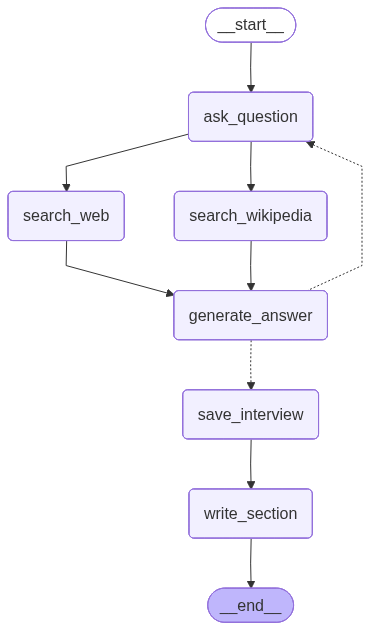

In [115]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [116]:
analyst

Analyst(name='Kenji Tanaka', role='AI Product Manager', affiliation='DataWise Inc.', description="Focuses on Langgraph's user experience and productization aspects. Concerned with ease of use, accessibility, and practical applications for end-users. Motivated by creating user-friendly AI products that solve real-world problems.")

In [117]:
analyst.persona

"Name: Kenji Tanaka\nRole: AI Product Manager\nAffiliation: DataWise Inc.\nDescription: Focuses on Langgraph's user experience and productization aspects. Concerned with ease of use, accessibility, and practical applications for end-users. Motivated by creating user-friendly AI products that solve real-world problems.\n"

In [118]:
thread = {"configurable": {"thread_id": "1"}}

In [119]:
from IPython.display import Markdown

In [120]:
messages = [HumanMessage("So you said you were writing an article on Langchain?")]

In [121]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

[HumanMessage(content='So you said you were writing an article on Langchain?', additional_kwargs={}, response_metadata={}, id='bbdc5581-4192-4cb0-884e-1974528d016a')]
*******************************
search_query='LangGraph misconceptions vs LangChain'
[HumanMessage(content='So you said you were writing an article on Langchain?', additional_kwargs={}, response_metadata={}, id='bbdc5581-4192-4cb0-884e-1974528d016a'), AIMessage(content='Hi Kenji, thanks for taking the time to chat. I\'m Alex, a product analyst, and I\'m trying to get a better handle on LangGraph, specifically from a user experience and product perspective. You mentioned you\'re working on making it more user-friendly at DataWise Inc., which is exactly what I\'m interested in.\n\nTo start, what\'s the biggest misconception people have about LangGraph, especially those who are familiar with LangChain? What\'s the "aha!" moment you try to create for new users?', additional_kwargs={}, response_metadata={'prompt_feedback': {'b

In [122]:
Markdown(interview['sections'][0])

## LangChain vs. LangGraph: Choosing the Right Tool for User-Friendly AI

### Summary

LangChain and LangGraph are both open-source frameworks developed by the LangChain team, designed to streamline the creation of AI applications, but they cater to different levels of workflow complexity [5]. LangChain is designed for simpler, linear workflows, making it ideal for rapid prototyping, basic chatbots, and Retrieval-Augmented Generation (RAG) pipelines [2, 5, 7]. It allows developers to quickly build modular LLM applications using chains and agents [5]. LangGraph, on the other hand, is designed for complex workflows with loops, decisions, and branching paths [1]. It excels in building stateful, multi-agent systems that require intricate data relationships and transactional integrity [2, 6].

The key difference lies in their architecture: LangChain uses chains of components like memory, prompts, and LLMs, while LangGraph employs a graph-based structure with nodes, edges, and states [3, 6]. LangGraph's explicit state management allows nodes to access and modify the state, enabling context-aware behaviors that evolve throughout the interaction [3, 6]. This makes LangGraph suitable for applications needing to maintain context over time, such as virtual assistants [3, 6]. While LangChain can pass information through a chain, it lacks persistent state management across multiple runs [3, 6].

A common misconception is that LangChain and LangGraph are interchangeable [4]. In reality, LangChain is better for straightforward tasks, while LangGraph is designed for complex, distributed systems needing advanced orchestration [4]. Many developers use both frameworks together, leveraging LangChain for building blocks and LangGraph for orchestrating their interactions [7]. LangChain is easier for beginners due to its simplicity and extensive resources, while LangGraph requires more upfront effort but offers unmatched control for complex systems [2, 5].

In summary:
1. LangChain is suited for linear, modular workflows, quick setups, and prototypes [2, 5, 7].
2. LangGraph is designed for complex, stateful, and multi-agent systems with dynamic control flows [2, 6].
3. LangGraph builds upon the LangChain ecosystem, often used together for orchestration [4, 7].

### Sources
[1] https://python.plainenglish.io/langchain-vs-langgraph-the-beginners-guide-15daa489c018
[2] https://duplocloud.com/blog/langchain-vs-langgraph/
[3] https://medium.com/@tahirbalarabe2/%EF%B8%8Flangchain-vs-langgraph-a-comparative-analysis-ce7749a80d9c
[4] https://sparkco.ai/blog/langchain-vs-langgraph-a-deep-dive-comparison
[5] https://kanerika.com/blogs/langchain-vs-langgraph/
[6] https://milvus.io/blog/langchain-vs-langgraph.md
[7] https://www.freecodecamp.org/news/how-to-use-langchain-and-langgraph-a-beginners-guide-to-ai-workflows/

## third Workflow

In [123]:
from typing_extensions import TypedDict
from typing import List, Annotated
import operator
class ResearchGraphState(TypedDict):
    topic: str # Research topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # Send() API key
    introduction: str # Introduction for the final report
    content: str # Content for the final report
    conclusion: str # Conclusion for the final report
    final_report: str # Final report
    
# class InterviewState(MessagesState):
#     max_num_turns: int # Number turns of conversation
#     context: Annotated[list, operator.add] # Source docs
#     analyst: Analyst # Analyst asking questions
#     interview: str # Interview transcript
#     sections: list # Final key we duplicate in outer state for Send() API

In [124]:
from langgraph.types import Send

In [125]:
def initiate_all_interviews(state:ResearchGraphState):
    """ This is the "map" step where we run each interview sub-graph using Send API """ 
    
    #check if human feedback
    human_analyst_feedback=state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # Return to create_analysts
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() API
    else:
        topic = state["topic"]
        return [Send("conduct_interview", {"analyst": analyst,
                                        "messages": [HumanMessage(
                                            content=f"So you said you were writing an article on {topic}?"
                                        )
                                                ]}) for analyst in state["analysts"]]


In [126]:
# def write_report(state:ResearchGraphState):
#     """_summary_

#     Args:
#         state (ResearchGraphState): _description_
#     """
#     pass

In [128]:
report_writer_instructions = """You are a technical writer creating a report on this overall topic: 

{topic}
    
You have a team of analysts. Each analyst has done two things: 

1. They conducted an interview with an expert on a specific sub-topic.
2. They write up their finding into a memo.

Your task: 

1. You will be given a collection of memos from your analysts.
2. Think carefully about the insights from each memo.
3. Consolidate these into a crisp overall summary that ties together the central ideas from all of the memos. 
4. Summarize the central points in each memo into a cohesive single narrative.

To format your report:
 
1. Use markdown formatting. 
2. Include no pre-amble for the report.
3. Use no sub-heading. 
4. Start your report with a single title header: ## Insights
5. Do not mention any analyst names in your report.
6. Preserve any citations in the memos, which will be annotated in brackets, for example [1] or [2].
7. Create a final, consolidated list of sources and add to a Sources section with the `## Sources` header.
8. List your sources in order and do not repeat.

[1] Source 1
[2] Source 2

Here are the memos from your analysts to build your report from: 

{context}"""

In [130]:
def write_report(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    print(formatted_str_sections)
    
    # Summarize the sections into a final report
    system_message = report_writer_instructions.format(topic=topic, context=formatted_str_sections)    
    report = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Write a report based upon these memos.")]) 
    return {"content": report.content}

In [131]:
intro_conclusion_instructions = """You are a technical writer finishing a report on {topic}

You will be given all of the sections of the report.

You job is to write a crisp and compelling introduction or conclusion section.

The user will instruct you whether to write the introduction or conclusion.

Include no pre-amble for either section.

Target around 100 words, crisply previewing (for introduction) or recapping (for conclusion) all of the sections of the report.

Use markdown formatting. 

For your introduction, create a compelling title and use the # header for the title.

For your introduction, use ## Introduction as the section header. 

For your conclusion, use ## Conclusion as the section header.

Here are the sections to reflect on for writing: {formatted_str_sections}"""

In [132]:
def write_introduction(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    intro = llm.invoke([instructions]+[HumanMessage(content=f"Write the report introduction")]) 
    return {"introduction": intro.content}

In [133]:
def write_conclusion(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"Write the report conclusion")]) 
    return {"conclusion": conclusion.content}

In [134]:
def finalize_report(state: ResearchGraphState):
    """ The is the "reduce" step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """
    # Save full final report
    content = state["content"]
    if content.startswith("## Insights"):
        content = content.strip("## Insights")
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    return {"final_report": final_report}

In [135]:
# Add nodes and edges 
builder = StateGraph(ResearchGraphState)
builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())
builder.add_node("write_report",write_report)
builder.add_node("write_introduction",write_introduction)
builder.add_node("write_conclusion",write_conclusion)
builder.add_node("finalize_report",finalize_report)

# Logic
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback", initiate_all_interviews, ["create_analysts", "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion", "write_report", "write_introduction"], "finalize_report")
builder.add_edge("finalize_report", END)


In [136]:
memory = MemorySaver()

In [137]:
graph = builder.compile(interrupt_before=['human_feedback'], checkpointer=memory)

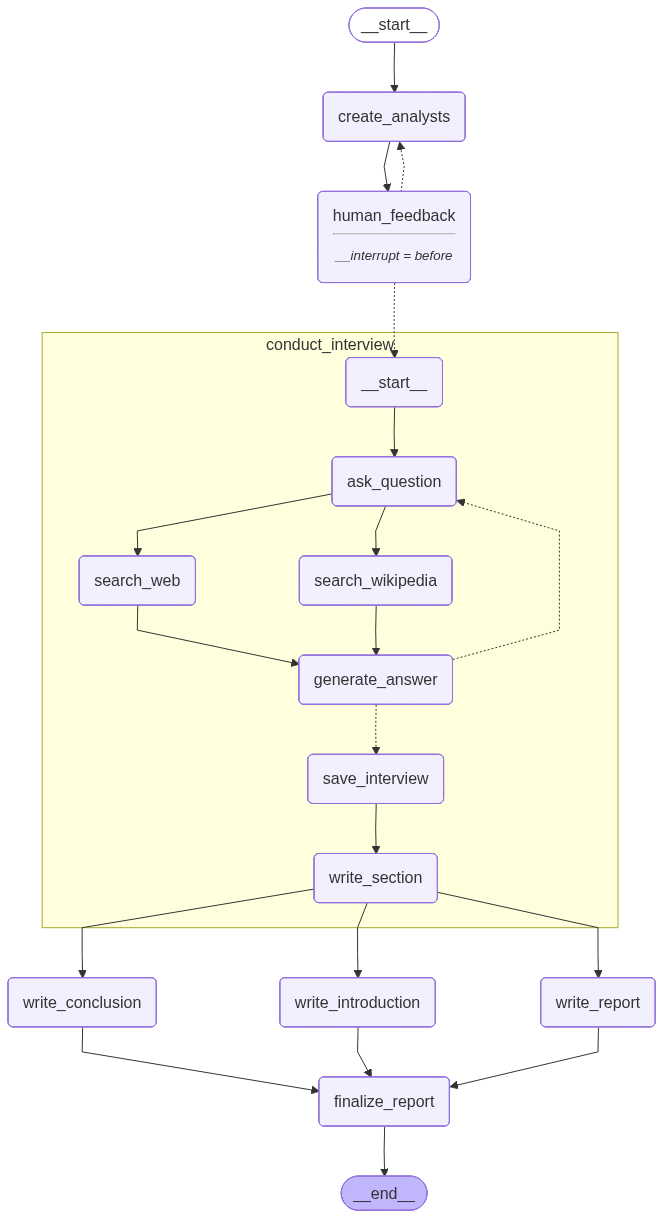

In [138]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [139]:
max_analysts = 3

In [140]:
topic = "How can generative help us to play the cricket?"

In [141]:
topic = "How can generative AI accelerate drug discovery?"

In [142]:
thread = {"configurable": {"thread_id": "1"}}

In [143]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

Name: Dr. Anya Sharma
Affiliation: BioAI Solutions
Role: AI Drug Discovery Consultant
Description: Focuses on how generative AI can optimize lead compound identification and reduce preclinical development timelines, but is concerned about the validation of AI-generated candidates.
--------------------------------------------------
Name: Dr. Ben Carter
Affiliation: AI Safety Institute
Role: Generative AI Ethics Researcher
Description: Specializes in the ethical implications of using generative AI in drug discovery, particularly regarding data privacy, algorithmic bias, and equitable access to AI-driven therapies. He is motivated by ensuring responsible AI innovation.
--------------------------------------------------
Name: Dr. Chloe Davis
Affiliation: PharmaCorp Innovations
Role: Pharmaceutical AI Integration Manager
Description: Interested in the practical challenges of integrating generative AI tools into existing pharmaceutical workflows, including data management, infrastructure req

In [144]:
graph.update_state(thread, {"human_analyst_feedback":"along with the genetive ai in future tell me the future of indian team"}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc539-d048-6698-8002-78efaaa30079'}}

In [145]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

Name: Dr. Anya Sharma
Affiliation: BioAI Solutions
Role: AI Drug Discovery Consultant
Description: Focuses on how generative AI can optimize lead compound identification and reduce preclinical development timelines, but is concerned about the validation of AI-generated candidates.
--------------------------------------------------
Name: Dr. Ben Carter
Affiliation: AI Safety Institute
Role: Generative AI Ethics Researcher
Description: Specializes in the ethical implications of using generative AI in drug discovery, particularly regarding data privacy, algorithmic bias, and equitable access to AI-driven therapies. He is motivated by ensuring responsible AI innovation.
--------------------------------------------------
Name: Dr. Chloe Davis
Affiliation: PharmaCorp Innovations
Role: Pharmaceutical AI Integration Manager
Description: Interested in the practical challenges of integrating generative AI tools into existing pharmaceutical workflows, including data management, infrastructure req

In [146]:
graph.update_state(thread, {"human_analyst_feedback":""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc53a-3b77-6322-8006-f98a994bcd56'}}

In [147]:
graph.get_state(thread).next

('conduct_interview', 'conduct_interview', 'conduct_interview')

In [148]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

[HumanMessage(content='So you said you were writing an article on How can generative AI accelerate drug discovery??', additional_kwargs={}, response_metadata={}, id='482a77c3-8659-41ed-83dc-2d2db252520a')]
[HumanMessage(content='So you said you were writing an article on How can generative AI accelerate drug discovery??', additional_kwargs={}, response_metadata={}, id='96015205-f1d6-4770-a58f-09e8b824431a')][HumanMessage(content='So you said you were writing an article on How can generative AI accelerate drug discovery??', additional_kwargs={}, response_metadata={}, id='d6939bc2-362e-429b-b278-5f102f9bac4c')]



*******************************
search_query='generative AI applications in drug discovery bottlenecks'
*******************************
search_query='generative AI accelerate drug discovery in India example'
*******************************
search_query='generative AI accelerate drug discovery global health inequities'
[HumanMessage(content='So you said you were writing an article on How can generative AI accelerate drug discovery??', additional_kwargs={}, response_metadata={}, id='d6939bc2-362e-429b-b278-5f102f9bac4c'), AIMessage(content="Hello Mr. Tanaka, my name is Anya Sharma, and I'm an analyst researching the transformative potential of generative AI in drug discovery. I understand you're at the forefront of establishing ethical guidelines for its use at the WHO.\n\nMy initial question is: Beyond the commonly cited benefits like faster identification of drug candidates and reduced costs, what's a less obvious, but potentially game-changing, way generative AI could accelerate drug 

In [149]:
from IPython.display import Markdown

In [150]:
final_state = graph.get_state(thread)


In [154]:
final_state.values.get('sections')

['## Generative AI: Reshaping Drug Discovery for Complex Diseases\n\n### Summary\nGenerative AI is rapidly transforming the landscape of drug discovery, particularly for complex diseases, by accelerating timelines, enhancing precision, and reducing costs [3, 5, 13]. This technology leverages deep learning models, such as generative adversarial networks (GANs) and autoencoders, to design novel drug candidates and optimize their properties [3, 16]. Generative AI\'s ability to analyze vast datasets from genomics, proteomics, and clinical studies enables the prediction of molecular properties and the design of new compounds with greater efficiency than traditional methods [13, 14].\n\nOne of the most significant impacts of generative AI is the acceleration of the drug discovery timeline, potentially condensing it from years to just months [2]. This is achieved through AI-powered predictions and simulations that streamline early-stage research, enabling faster progression from concept to vi

In [158]:
final_state.values.get('content')

'## Insights\n\nGenerative AI (GenAI) is revolutionizing drug discovery by accelerating timelines, enhancing precision, and reducing costs [3, 5, 13]. Deep learning models like generative adversarial networks (GANs) and autoencoders are being used to design novel drug candidates and optimize their properties [3, 16]. The ability of GenAI to analyze vast datasets from genomics, proteomics, and clinical studies enables the prediction of molecular properties and the design of new compounds with greater efficiency than traditional methods [13, 14]. This acceleration can potentially condense the drug discovery timeline from years to months [2]. AI-powered predictions and simulations streamline early-stage research, enabling faster progression from concept to viable drug candidate [12]. GenAI also excels in lead optimization, suggesting molecular modifications to enhance drug efficacy and safety [12, 13], improving binding affinity, metabolic stability, and reducing toxicity, which can impro

In [156]:
final_state.values.get('analysts')

[Analyst(name='Dr. Anya Sharma', role='AI Drug Discovery Lead', affiliation='Global Pharma Inc.', description='Focuses on using generative AI to design novel drug candidates, particularly for complex diseases. Concerned with the ethical implications and potential biases in AI-driven drug discovery. Motivated by the potential to accelerate the development of life-saving treatments.'),
 Analyst(name='Raj Patel', role='Generative AI Specialist', affiliation='Indian Institute of Technology (IIT)', description='Specializes in the application of generative AI models for drug repurposing and target identification within the Indian pharmaceutical context. Interested in promoting indigenous drug discovery efforts and addressing healthcare challenges specific to the Indian population. Motivated by the opportunity to make affordable medicines more accessible.'),
 Analyst(name='Kenji Tanaka', role='AI Ethics and Governance Advisor', affiliation='World Health Organization (WHO)', description='Focus

In [151]:
report = final_state.values.get('final_report')

In [152]:
Markdown(report)

# Unleashing the Potential: Generative AI in Drug Discovery

## Introduction
Generative AI is revolutionizing drug discovery, promising faster, more precise, and cost-effective solutions for complex diseases. This report explores how AI models are designing novel drug candidates and optimizing their properties, accelerating timelines from years to months. We examine AI's ability to tackle previously "undruggable" targets and the increasing collaborations between AI and pharmaceutical companies. Furthermore, we delve into how generative AI is transforming the Indian pharmaceutical sector, enhancing efficiency, and driving global competitiveness. Finally, we address the ethical considerations surrounding AI in drug discovery, emphasizing the need for transparency, accountability, and equitable access to benefits.

---



Generative AI (GenAI) is revolutionizing drug discovery by accelerating timelines, enhancing precision, and reducing costs [3, 5, 13]. Deep learning models like generative adversarial networks (GANs) and autoencoders are being used to design novel drug candidates and optimize their properties [3, 16]. The ability of GenAI to analyze vast datasets from genomics, proteomics, and clinical studies enables the prediction of molecular properties and the design of new compounds with greater efficiency than traditional methods [13, 14]. This acceleration can potentially condense the drug discovery timeline from years to months [2]. AI-powered predictions and simulations streamline early-stage research, enabling faster progression from concept to viable drug candidate [12]. GenAI also excels in lead optimization, suggesting molecular modifications to enhance drug efficacy and safety [12, 13], improving binding affinity, metabolic stability, and reducing toxicity, which can improve success rates in clinical trials [12, 13].

GenAI is also proving valuable in tackling previously "undruggable" targets, such as GPCRs and ion channels [2]. AI algorithms can tap into large databases of existing molecules to learn patterns in chemical structures and design potential drugs that can interact with these challenging targets [5]. This is particularly relevant for complex diseases, where traditional drug discovery methods often fall short.

The integration of machine learning (ML) and natural language processing (NLP) is accelerating the identification of drug targets, predicting bioactivity and toxicity, and streamlining regulatory submissions [1]. AI algorithms are being used to analyze vast biomedical datasets, uncovering hidden relationships between drugs and diseases [18]. This is particularly beneficial for identifying new therapeutic uses for existing drugs, addressing parasitic and orphan diseases that disproportionately affect developing countries [18, 16].

In the Indian pharmaceutical sector, GenAI is reducing the time and cost associated with drug development, with projections indicating a 50-60% reduction compared to traditional methods [1, 17]. Indian pharmaceutical companies are increasingly adopting AI-driven solutions to improve operational efficiency, enhance research capabilities, and reduce costs [2, 3]. AI-driven solutions are enabling Indian companies to compete globally, particularly in the generics market, by identifying off-patent drugs for first-mover advantage [2]. Initiatives like the National Health Authority’s collaboration with IIT, along with investments from prominent CROs, CDMOs, and top pharma firms, are actively promoting the use of GenAI in drug development [1, 2].

However, the deployment of AI in drug discovery raises significant ethical considerations, including data privacy, algorithmic bias, and equitable access to benefits [2, 6, 7]. It is crucial to establish guidelines and frameworks that promote responsible AI development and deployment, ensuring that these technologies benefit all of humanity [2, 8]. Transparency and accountability are essential for building trust in AI systems [5, 7, 8]. It is important to clarify who is responsible for the outcomes generated by AI and to establish regulatory mechanisms to prevent potential adverse effects on patients [7]. Additionally, AI systems should be designed to respect patient privacy, promote equity, and mitigate biases [6, 7, 9]. The World Health Organization (WHO) has emphasized the importance of ethical oversight and has released guidance on the ethics and governance of large multi-modal models (LMMs) [5, 6].


---

## Conclusion

Generative AI is poised to revolutionize drug discovery, offering accelerated timelines, enhanced precision, and reduced costs. Its ability to design novel drug candidates and optimize their properties promises to tackle complex diseases and previously "undruggable" targets. In India, GenAI is accelerating drug repurposing and target identification, addressing healthcare challenges specific to the Indian population. However, ethical considerations surrounding data privacy, algorithmic bias, and equitable access must be addressed. By adhering to ethical guidelines promoting transparency, accountability, and inclusivity, we can harness the full potential of generative AI to improve global health outcomes and advance health equity.

## Sources

[1] https://www.ey.com/en_in/insights/health/how-gen-ai-is-revolutionizing-the-pharmaceutical-industry
[2] https://www.drugtargetreview.com/article/163308/next-generation-drug-design-ai-tackle-undruggable-targets/
[3] https://www.sciencedirect.com/science/article/pii/S135964462400117X
[4] https://www.mckinsey.com/industries/life-sciences/our-insights/generative-ai-in-the-pharmaceutical-industry-moving-from-hype-to-reality
[5] https://www.nature.com/articles/d41586-025-00602-5
[6] https://www.aoshearman.com/en/insights/ao-shearman-on-life-sciences/ai-in-healthcare-legal-and-ethical-considerations-at-the-new-frontier
[7] https://www.thelancet.com/journals/landig/article/PIIS2589-7500(24)00143-2/fulltext
[8] https://digitalhealthcrc.com/future-thinking/new-paper-introduces-ethics-framework-for-use-of-generative-ai-in-healthcare/
[9] https://en.wikipedia.org/wiki/Algorithmic_bias
[10] https://en.wikipedia.org/wiki/Artificial_intelligence
[11] https://en.wikipedia.org/wiki/Artificial_intelligence_in_healthcare
[12] https://www.intuz.com/blog/drug-discovery-and-development-using-generative-ai
[13] https://www.delveinsight.com/blog/generative-ai-drug-discovery-market-impact
[14] https://murphi.ai/drug-discovery/
[15] https://synapse.patsnap.com/article/how-does-ai-help-optimize-lead-compounds-in-the-drug-discovery-pipeline
[16] https://en.wikipedia.org/wiki/Autoencoder
[17] https://www.biospectrumindia.com/views/17/26747/how-ai-is-accelerating-drug-repurposing-therapeutic-innovation-in-india.html
[18] https://pmc.ncbi.nlm.nih.gov/articles/PMC11510778/
[19] https://www.loestro.com/code-meets-cure-how-generative-ai-is-transforming-pharma/
[20] https://pharmacypro.io/news/50-indian-pharma-companies-investing-in-ai-driven-solutions-as-industry-accelerates-digital-transformation
[21] https://www.who.int/news/item/18-01-2024-who-releases-ai-ethics-and-governance-guidance-for-large-multi-modal-models
[22] https://jogh.org/2025/jogh-15-03002/
[23] https://pmc.ncbi.nlm.nih.gov/articles/PMC11444559/